In [1]:
from bs4 import BeautifulSoup # For HTML parsing
from urllib.request import urlopen # Website connections
import re # Regular expressions
from time import sleep # To prevent overwhelming the server between connections
from collections import Counter # Keep track of our term counts
from nltk.corpus import stopwords # Filter out stopwords, such as 'the', 'or', 'and'
import pandas as pd # For converting results to a dataframe and bar chart plots
%matplotlib inline
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Johnny\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
def text_cleaner(website):

    '''
    Inputs: url
    Outputs: list of unique words
    '''
    try:
        site = urlopen(website).read() # Connect to the job posting
       

        law_page = BeautifulSoup(site,"lxml") # Get the html from the site   

        law_row = []  

        dd = law_page.find_all("dd")
        link = []

        for links in law_page.find_all("dd"):
            if links.find("a") != None:
                x = links.a['href']
                link.append(x)

        title = law_page.find("title").text
        country = dd[0].text
        date = law_page.find("span",attrs = {"class": "sr-date sr-help"}).text
        abstract = law_page.find("p",attrs = {"class": "abstract"}).text
        sitelink = website
        full_text_link = link[1]

        if dd[2].text == " Regulation":
            document_type = dd[2].text
        elif dd[2].text == " Legislation":
            document_type = dd[2].text
        else: document_type = dd[1].text


        law_row.append({'Title': title,
                        'Country': country,
                        'Date': date[0:4],
                        'Document Type': document_type,
                        'Abstract': abstract,
                        'Law Link': sitelink,
                        'Full Text Link': full_text_link
                 })

        return law_row
    
    except Exception: 
        pass


In [3]:
#Enter and encode search terms
import urllib.parse

countries = ["Antigua And Barbuda", 'Barbados', 'Brazil', 
             'Bahamas', 'Belize', 'Colombia', 'Costa Rica', 'Dominica', 
             'Dominican Republic', 'Grenada', "Guatemala", 'Guyana', 'Honduras', 
             'Haiti', 'Jamaica', 'St. Kitts And Nevis', 'St. Lucia', 'Mexico', 'Nicaragua', 
             'Panama', 'St. Vincent and Grenadines']

law_urls = []
law_dict = [] # Store all our descriptions in this list

for i in range(len(countries)):
    
    search = str(countries[i]) 
    encSrch = urllib.parse.quote(search)
    srchURL = "https://www.ecolex.org/result/?=" + encSrch +"&xsubjects=Fisheries&xcountry=" + encSrch + "&page="
    base_url = 'https://www.ecolex.org'
 
    for i in range(1,25): # Loop through all of our search result pages
        print('Getting page ' + str(i)) 
        start_num = str(i) # Assign the multiplier of 10 to view the pages we want
        current_page = ''.join([srchURL + start_num]) #replace Boston and MA with different city/state
            # Now that we can view the correct 10 job returns, start collecting the text samples from each

        html_page = urlopen(current_page).read() # Get the page

        page_obj = BeautifulSoup(html_page) # Locate all of the job links
        job_link_area = page_obj.find(id = 'search-form') # The center column on the page where the job postings exist
        job_link_area = job_link_area.find_all('a')        
        job_URLS = [link.get('href') for link in job_link_area] # Get the URLS for the jobs
        job_URLS = [(base_url + str(link)) for link in job_URLS]  
        job_URLS = [links for links in job_URLS if "details" in links]
        job_URLS = [links for links in job_URLS if "legislation" in links]
        law_urls.append(job_URLS)

print('Done with collecting laws!')   
        
law_urls = [item for sublist in law_urls for item in sublist]


Getting page 1


C:\Users\Johnny\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\Johnny\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


Getting page 2
Getting page 3
Getting page 4
Getting page 5
Getting page 6
Getting page 7
Getting page 8
Getting page 9
Getting page 10
Getting page 11
Getting page 12
Getting page 13
Getting page 14
Getting page 15
Getting page 16
Getting page 17
Getting page 18
Getting page 19
Getting page 20
Getting page 21
Getting page 22
Getting page 23
Getting page 24
Getting page 1
Getting page 2
Getting page 3
Getting page 4
Getting page 5
Getting page 6
Getting page 7
Getting page 8
Getting page 9
Getting page 10
Getting page 11
Getting page 12
Getting page 13
Getting page 14
Getting page 15
Getting page 16
Getting page 17
Getting page 18
Getting page 19
Getting page 20
Getting page 21
Getting page 22
Getting page 23
Getting page 24
Getting page 1
Getting page 2
Getting page 3
Getting page 4
Getting page 5
Getting page 6
Getting page 7
Getting page 8
Getting page 9
Getting page 10
Getting page 11
Getting page 12
Getting page 13
Getting page 14
Getting page 15
Getting page 16
Getting page 17
Ge

In [5]:
len(law_urls)

1940

In [6]:
for j in range(0,len(law_urls)):
    final_description = text_cleaner(law_urls[j])
    if final_description: # So that we only append when the website was accessed correctly
        law_dict.append(final_description)
print("Done parsing laws!")

Done parsing laws!


In [7]:
test = [item for sublist in law_dict for item in sublist]
dataframe = pd.DataFrame(test)

In [8]:
dataframe = dataframe [["Title", "Country", "Date", "Document Type", "Abstract", "Law Link", "Full Text Link"]]
dataframe

,Title,Country,Date,Document Type,Abstract,Law Link,Full Text Link
0,"Fisheries Act, 1993.",Barbados,1993,Legislation,An Act to provide for the management and devel...,https://www.ecolex.org/details/legislation/fis...,http://www.fao.org/faolex/results/details/en/c...
1,"Fisheries (Amendment) Act, 2000 (No. 8 of 2000).",Barbados,2000,Legislation,"Definitions of ""commercial fishing"" and ""relat...",https://www.ecolex.org/details/legislation/fis...,http://extwprlegs1.fao.org/docs/pdf/bar23713.pdf
2,Coastal Zone Management Act.,Barbados,1998,Legislation,This Act makes provision for the preservation ...,https://www.ecolex.org/details/legislation/coa...,http://extwprlegs1.fao.org/docs/pdf/bar18058.pdf
3,"Fisheries (Management) Regulations, 1998 (S.I....",Barbados,1998,Regulation,The Minister shall designate by Notice in the ...,https://www.ecolex.org/details/legislation/fis...,http://extwprlegs1.fao.org/docs/texts/bar18057...
4,"Marine Boundaries and Jurisdiction Act, 1978.",Barbados,1978,Legislation,This Act consists of 5 Parts: Preliminary (I);...,https://www.ecolex.org/details/legislation/mar...,http://www.fao.org/faolex/results/details/en/c...
5,Marine Areas (Preservation and Enhancement) (B...,Barbados,1981,Regulation,"In the Park there are created 4 zones, namely;...",https://www.ecolex.org/details/legislation/mar...,http://extwprlegs1.fao.org/docs/pdf/bar19686.pdf
6,Marine Areas (Preservation and Enhancement) Act.,Barbados,1976,Legislation,The Minister may design restricted areas in an...,https://www.ecolex.org/details/legislation/mar...,http://extwprlegs1.fao.org/docs/pdf/bar19683.pdf
7,Law No. 20.040 regulating fish farming within ...,Brazil,2018,Legislation,"This Law, consisting of 24 articles divided in...",https://www.ecolex.org/details/legislation/law...,http://extwprlegs1.fao.org/docs/pdf/bra175651.pdf
8,Norm IBAMA No. 8 establishing the procedures f...,Brazil,2017,Regulation,"This Norm, consisting of 24 articles and four ...",https://www.ecolex.org/details/legislation/nor...,http://extwprlegs1.fao.org/docs/pdf/bra139348.pdf
9,Norm MDIC No. 1 establishing the Certificate o...,Brazil,2017,Regulation,"This Norm, consisting of 7 articles and one An...",https://www.ecolex.org/details/legislation/nor...,http://extwprlegs1.fao.org/docs/pdf/bra174465.pdf


In [130]:
dataframe['Date'].value_counts()
dataframe['Country'].value_counts()

test3 = dataframe
test3 = test3.loc[~(test3['Date'] == '')]
test3['Date'] = test3['Date'].astype('int')

C:\Users\Johnny\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [131]:
test3

,Title,Country,Date,Document Type,Abstract,Law Link,Full Text Link
0,"Fisheries Act, 1993.",Barbados,1993,Legislation,An Act to provide for the management and devel...,https://www.ecolex.org/details/legislation/fis...,http://www.fao.org/faolex/results/details/en/c...
1,"Fisheries (Amendment) Act, 2000 (No. 8 of 2000).",Barbados,2000,Legislation,"Definitions of ""commercial fishing"" and ""relat...",https://www.ecolex.org/details/legislation/fis...,http://extwprlegs1.fao.org/docs/pdf/bar23713.pdf
2,Coastal Zone Management Act.,Barbados,1998,Legislation,This Act makes provision for the preservation ...,https://www.ecolex.org/details/legislation/coa...,http://extwprlegs1.fao.org/docs/pdf/bar18058.pdf
3,"Fisheries (Management) Regulations, 1998 (S.I....",Barbados,1998,Regulation,The Minister shall designate by Notice in the ...,https://www.ecolex.org/details/legislation/fis...,http://extwprlegs1.fao.org/docs/texts/bar18057...
4,"Marine Boundaries and Jurisdiction Act, 1978.",Barbados,1978,Legislation,This Act consists of 5 Parts: Preliminary (I);...,https://www.ecolex.org/details/legislation/mar...,http://www.fao.org/faolex/results/details/en/c...
5,Marine Areas (Preservation and Enhancement) (B...,Barbados,1981,Regulation,"In the Park there are created 4 zones, namely;...",https://www.ecolex.org/details/legislation/mar...,http://extwprlegs1.fao.org/docs/pdf/bar19686.pdf
6,Marine Areas (Preservation and Enhancement) Act.,Barbados,1976,Legislation,The Minister may design restricted areas in an...,https://www.ecolex.org/details/legislation/mar...,http://extwprlegs1.fao.org/docs/pdf/bar19683.pdf
7,Law No. 20.040 regulating fish farming within ...,Brazil,2018,Legislation,"This Law, consisting of 24 articles divided in...",https://www.ecolex.org/details/legislation/law...,http://extwprlegs1.fao.org/docs/pdf/bra175651.pdf
8,Norm IBAMA No. 8 establishing the procedures f...,Brazil,2017,Regulation,"This Norm, consisting of 24 articles and four ...",https://www.ecolex.org/details/legislation/nor...,http://extwprlegs1.fao.org/docs/pdf/bra139348.pdf
9,Norm MDIC No. 1 establishing the Certificate o...,Brazil,2017,Regulation,"This Norm, consisting of 7 articles and one An...",https://www.ecolex.org/details/legislation/nor...,http://extwprlegs1.fao.org/docs/pdf/bra174465.pdf


In [132]:
test2 = pd.DataFrame(test3.groupby(by=["Country","Date"])["Document Type"].count() ).reset_index()

In [141]:
test4 = pd.DataFrame(test3.groupby(by=["Date"])["Document Type"].count() ).reset_index()
test4 = test4.loc[test4['Date'] >= 1995]

In [136]:
test2 = test2.loc[test2['Date'] >= 1995]

In [137]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from seaborn import set_style

def plot_country(country):
    try:
        plt.figure()
        plot = test2.loc[test2['Country'] == str(country)]
        pl = sns.barplot(x=plot['Date'], y=plot["Document Type"]).set_title(country)
#         pl = pl.set_xticklabels(pl.get_xticklabels(),rotation=90)
        for item in pl.get_xticklabels():
            item.set_rotation(45)
        return pl
    except Exception: 
        pass

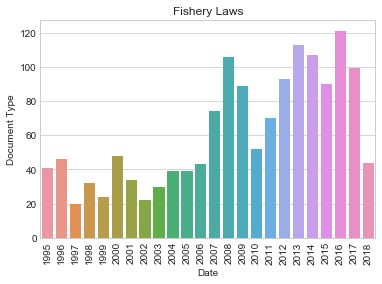

In [145]:
plt.figure()
pl = sns.barplot(x=test4['Date'], y=test4["Document Type"])
pl.set_title("Fishery Laws")
for item in pl.get_xticklabels():
            item.set_rotation(90)

C:\Users\Johnny\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<Figure size 432x288 with 0 Axes>

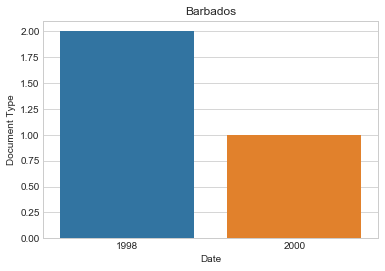

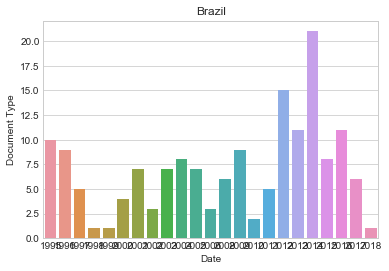

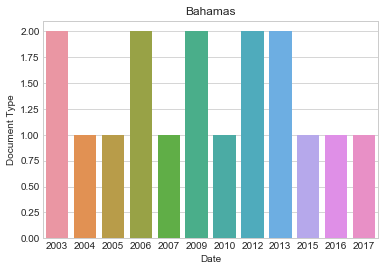

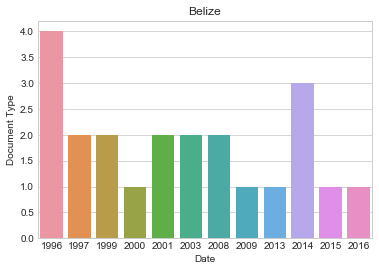

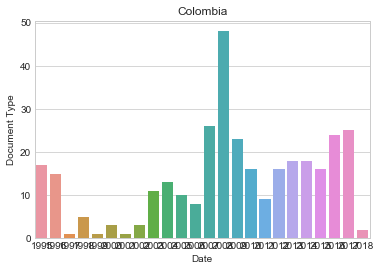

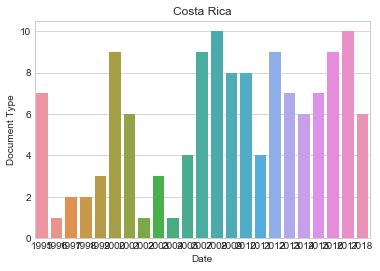

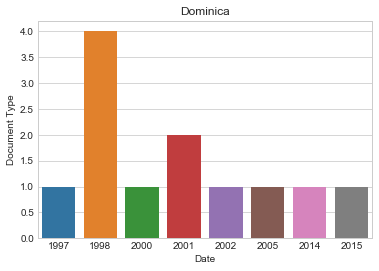

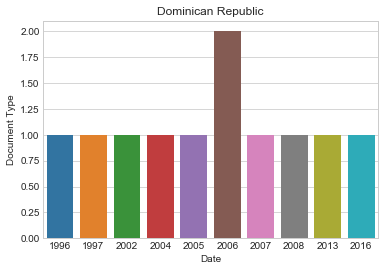

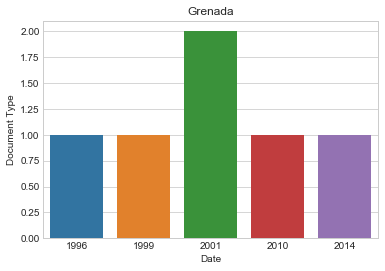

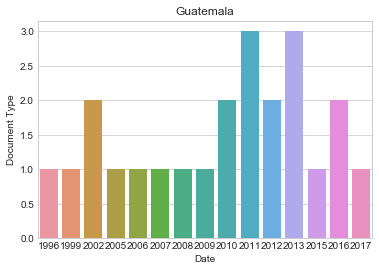

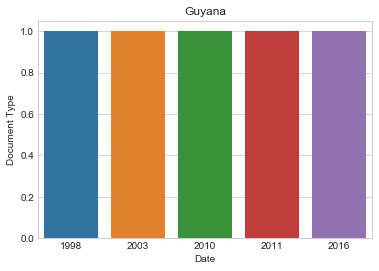

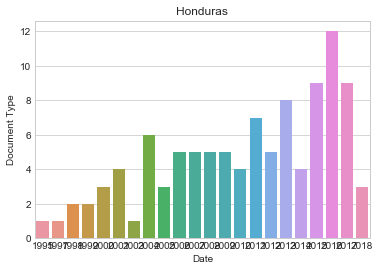

<Figure size 432x288 with 0 Axes>

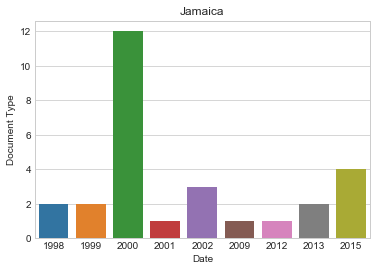

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

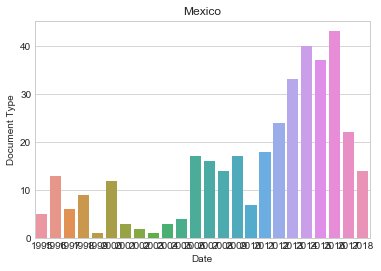

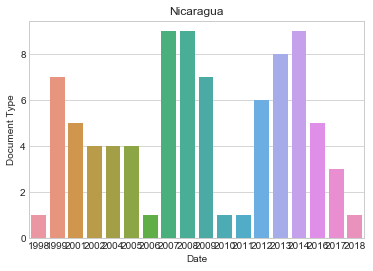

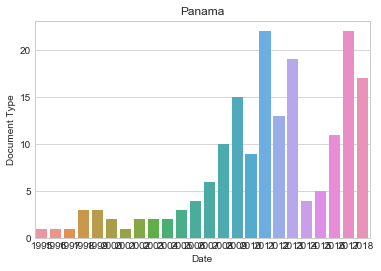

<Figure size 432x288 with 0 Axes>

In [138]:
 for i in range(len(countries)):
    country = countries[i]
    plot_country(country)